In [21]:
include("Energies.jl")
include("EnergyStruct.jl")
include("newArrheniusEq.jl")
include("Simulation.jl")
using Plots
using Printf
using Statistics
using LinearAlgebra
gr()
pe = PhaseEnergies(G_values, Ea_constants)
display(pe.Ea_plus_ΔG)

6×6 SMatrix{6, 6, Float64, 36} with indices SOneTo(6)×SOneTo(6):
 0.0    1.0    0.01  0.01   1.0    1.0
 1.022  0.0    1.0   1.0    1.005  1.002
 0.06   1.028  0.0   0.032  1.033  1.03
 0.038  1.006  0.01  0.0    1.011  1.008
 1.017  1.0    1.0   1.0    0.0    1.0
 1.02   1.0    1.0   1.0    1.003  0.0

In [22]:
T_range = 573:100:1173
flow_rates = 0.5:0.5:1.5
T_grid, f_grid = meshgrid(T_range, flow_rates)
threshold = 0.3 # Threshold for most preferable state
t = 600 # seconds
dt = 1.0/2 # 2 layers per second (700nm/hr)
num_steps = round(Int, t/dt)
phase_names = ["x", "α", "β", "κ", "γ", "δ"]
effecting_nums = num_steps
decay_constant = 0.00001
#print(size(decay_coefficients))
#println("fcoeff: ", size(fcoeff))
decay_coefficients = decay_constant * f_grid
fcoeff = flow_coefficient.("exponential", effecting_nums, decay_coefficients)
compositions_all = simulate_deposition.(fcoeff, Ref(pe), T_grid, Ref(num_steps), Ref(dt))

3×7 Matrix{Matrix{Float64}}:
 [1.0 0.0 … 0.0 0.0; 0.918334 8.00209e-11 … 8.00209e-11 8.00209e-11; … ; 0.181291 7.17278e-8 … 6.6554e-8 6.95952e-8; 0.181291 7.17873e-8 … 6.66091e-8 6.96529e-8]  …  [1.0 0.0 … 0.0 0.0; 0.909413 2.52532e-6 … 2.52532e-6 2.52532e-6; … ; 0.25061 0.00263943 … 0.00254896 0.00260271; 0.250608 0.0026416 … 0.00255106 0.00260485]
 [1.0 0.0 … 0.0 0.0; 0.918335 8.00205e-11 … 8.00205e-11 8.00205e-11; … ; 0.181291 7.1514e-8 … 6.63558e-8 6.93878e-8; 0.181291 7.1573e-8 … 6.64106e-8 6.94451e-8]      [1.0 0.0 … 0.0 0.0; 0.909413 2.5253e-6 … 2.5253e-6 2.5253e-6; … ; 0.250616 0.0026316 … 0.00254141 0.00259499; 0.250614 0.00263377 … 0.0025435 0.00259712]
 [1.0 0.0 … 0.0 0.0; 0.918335 8.00201e-11 … 8.00201e-11 8.00201e-11; … ; 0.181291 7.1301e-8 … 6.61583e-8 6.91812e-8; 0.181291 7.13597e-8 … 6.62128e-8 6.92382e-8]     [1.0 0.0 … 0.0 0.0; 0.909414 2.52529e-6 … 2.52529e-6 2.52529e-6; … ; 0.250621 0.00262381 … 0.00253389 0.00258731; 0.25062 0.00262596 … 0.00253596 0.00258943]

In [23]:
max_compositions = most_preferable_state.(compositions_all, Ref(threshold), Ref(phase_names))
max_compositions[1,1] = "x"
max_compositions[1,2] = "β"
max_compositions[3,7] = "δ"
display(max_compositions)

3×7 Matrix{String}:
 "x"    "β"    "β+κ"  "β+κ"  "β+κ"  "β+κ"  "β+κ"
 "β+κ"  "β+κ"  "β+κ"  "β+κ"  "β+κ"  "β+κ"  "β+κ"
 "β+κ"  "β+κ"  "β+κ"  "β+κ"  "β+κ"  "β+κ"  "δ"

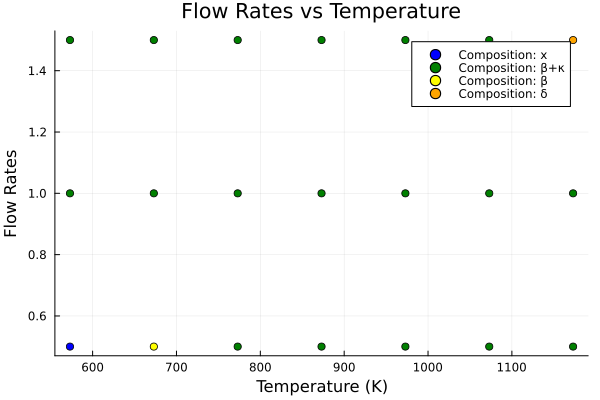

In [24]:

# Create a list of colors
colorlist = ["red", "blue", "green", "yellow", "orange", "purple", "cyan", "magenta", "black", "gray"]

# Assign Colors
unique_values = unique(max_compositions)
color_dict = Dict(unique_values[i] => colorlist[i % length(colorlist) + 1] for i in 1:length(unique_values))

# Create a scatter canvas
p = scatter([], [], xlabel="Temperature (K)", ylabel="Flow Rates", title="Flow Rates vs Temperature", label=false)  # Create an empty scatter plot with no label
for (i, flow_rate) in enumerate(flow_rates)
    for (j, T) in enumerate(T_range)
        color = color_dict[max_compositions[i, j]]  # Get the color based on the max_composition
        scatter!(p, [T], [flow_rate], color=color, label=false)
    end
end

# Add Legend
for (i, value) in enumerate(unique_values)
    scatter!(p, [], [], color=color_dict[value], label="Composition: $value")  # Add an empty scatter plot with the correct color and label
end

display(p)